# Introduction - Graded Challenge 7 Inference

| **Nama**       | **Heru Ramadhan** |
|----------------|--------------------|
| **Batch**      | HCK - 018          |

# Import Libraries

In [26]:
import numpy as np
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt

# Model Inference

### Load Model

Load Model yang akan digunakan untuk prediksi

In [27]:
model = tf.keras.models.load_model('model_adam-4.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Prediction

Saving bonecancer.jpg to bonecancer (4).jpg


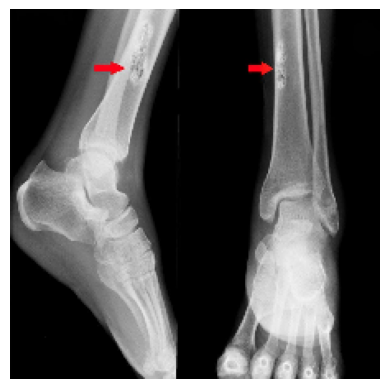

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.02143759]]
cancer


In [57]:
# Image Preprocessing
img_height = 225
img_width = 225

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():

  # Load and preprocess the image
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(img_height, img_width))  # Resizing the image to match model's input size
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

  # Convert the image to array
  x = tf.keras.utils.img_to_array(img)  # Convert image to array
  x = np.expand_dims(x, axis=0)  # Expanding array dimensions to match model input requirements
  x = x / 255.0  # Rescaling the image (normalizing pixel values to [0, 1])

  # Stack images for batch processing
  images = np.vstack([x])

  # Make predictions using the model
  classes = model.predict(images)  # Use the best model for predictions
  print(classes)

  # Interpreting the prediction
  result_pred = np.where(classes < 0.1, 0, 1)
  if result_pred == 0:
    print('cancer')
  else:
    print('normal')
